<a href="https://colab.research.google.com/github/dhananjai14/ML-Concepts/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algerian Forest Fire**

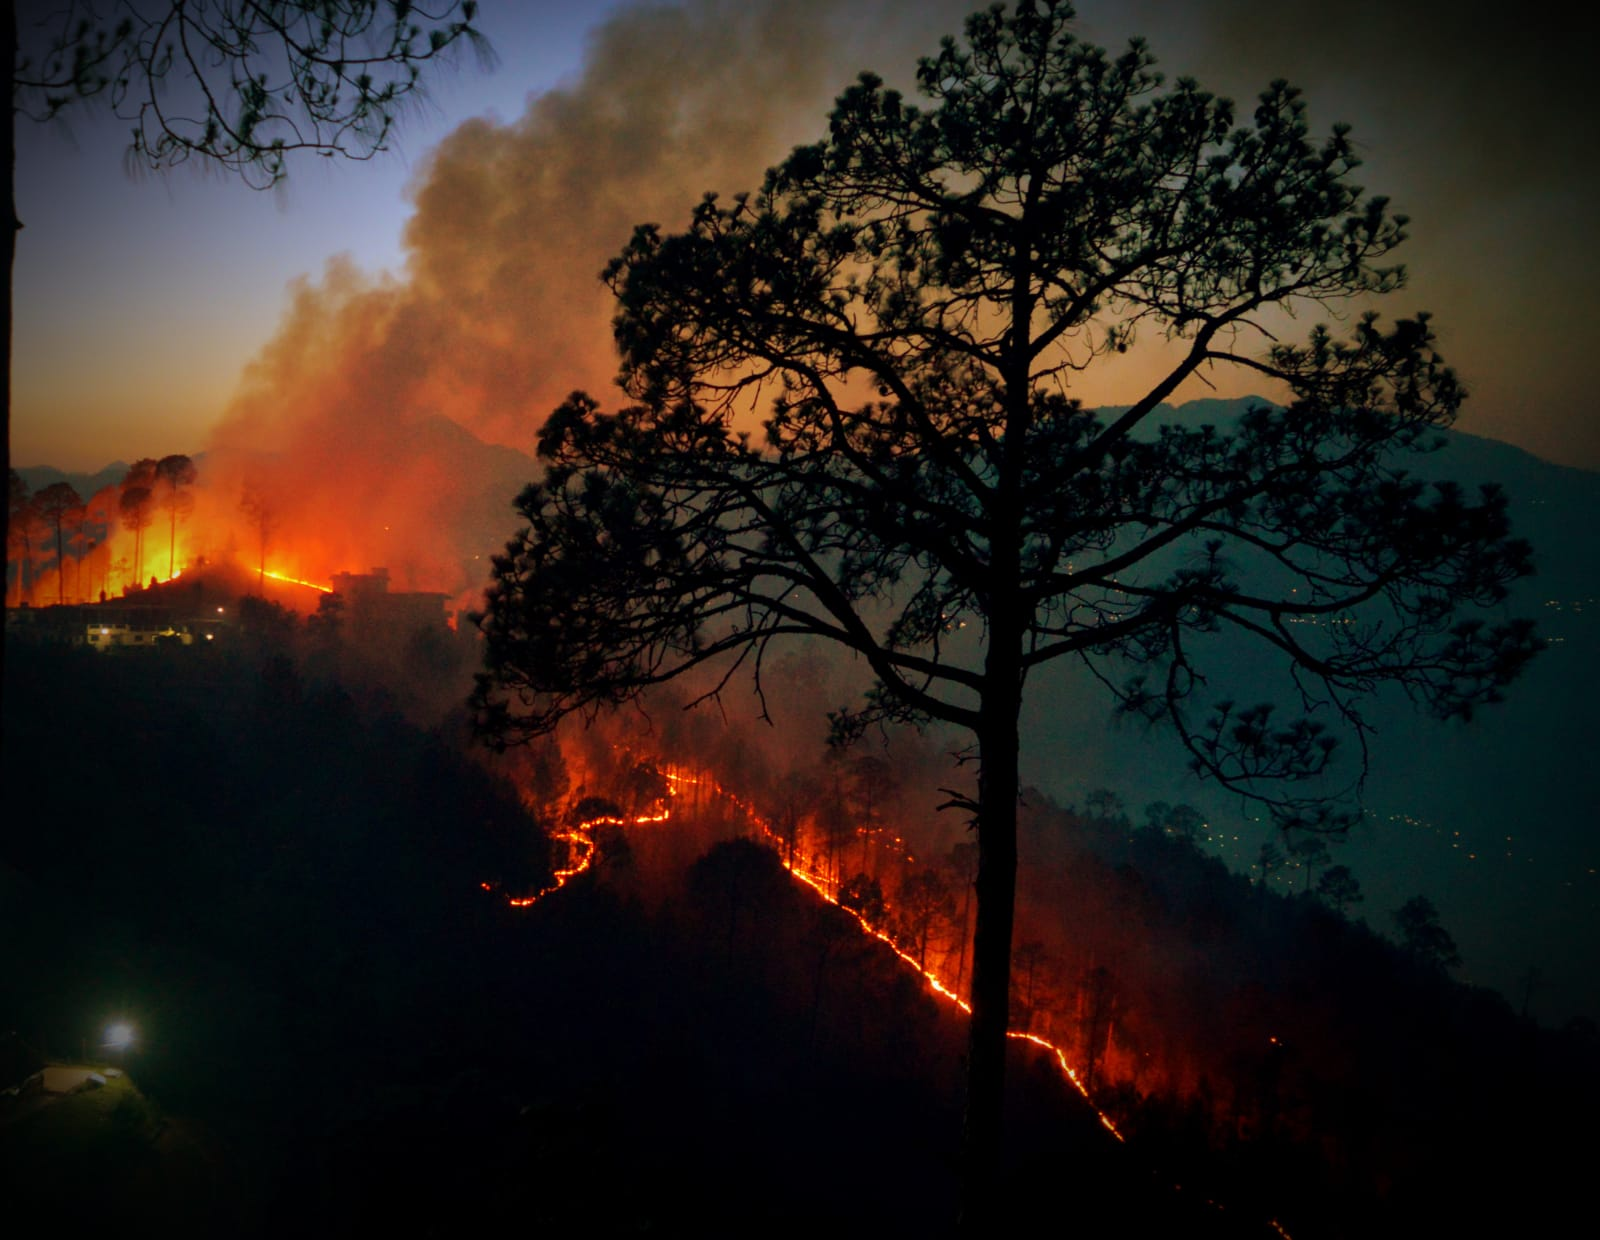

# EDA on Forest Fire in Algeria dataset 

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

Each region has 122 instances each.
The data is collected from period of June 2012 to September 2012.

The dataset includes 11 attribues and 1 output attribue (class). The 244 instances have been classified into 138 fire classes and 106 not fire classes.



### Problem Statement 

Based on the given input, a prediction need to be made if there will be fire or not in a particular area. 

### Data description
Attribute name | Description | Data range
---------- | ---------- |---------
Day |  Date in particular month | 1-31
month | month of the year 2012 |6-9
year | Year | 2012
Temp | Max temperature in a day in Celsius degrees. |  It ranges from 22 to 42
RH | Relative Humidity in % | 21 to 90
Ws | Wind speed in km/h | 6 to 29
Rain | total day in mm | 0 to 16.8
Fine Fuel Moisture Code (FFMC) | index from the FWI system | 28.6 to 92.5
Duff Moisture Code (DMC) | index from the FWI system | 1.1 to 65.9
Drought Code (DC) | index from the FWI system | 7 to 220.4
Initial Spread Index (ISI) | index from the FWI system | 0 to 18.5
Buildup Index (BUI) | index from the FWI system | 1.1 to 68
Fire Weather Index (FWI) | from the FWI system | 0 to 31.1
Classes | two classes, that give info about fire | Fire and Not fire 

# 1. Exploring the data

Exploreing data require data to be collected from the the source and load into the python. 
Data is collected from [Algerian Forest Fires Dataset](https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#) present in UCI Machine Learning repository.

## 1.1 Importing the required packages 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('ggplot')

warnings.filterwarnings("ignore")

%matplotlib inline

## 1.2 Import the dataset and data cleaning

**import data in pandas dataframe**

In [66]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA Set/Algerian_forest_fires_dataset_UPDATE (1).csv', header=1)



Observations: 
1. From index 0 to 122 we had Bejai region  
2. From index 123 to 124 we had irrelevant rows
3. From index 125 onwards we had SidiBel region. 


In [67]:
# Creating the clean dataset
data.drop(index = [122,123,124],inplace = True) # drop the irrelevant rows 
data.reset_index(drop = True, inplace = True) # Creating new index
data['region'] = 0
# separating the dataset based on the location 
for i in range(len(data)):    
    if i < 123:
        data['region'][i] =  1
    else:
        data['region'][i] = 0


**Cleaning the columns names**

In [68]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

Observations: 
1. Column names has extra spaces at the end 

In [69]:
# correcting the columns names
for col in data.columns:
    data.rename(columns = {col: col.strip()}, inplace = True)


**Looking at irregularities in dataset**

In [70]:
data.iloc[164,:]


day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
region               0
Name: 164, dtype: object

Observation:
1. Data at index 164 has 

column | Value
------|---------
DC |  14.6 9
ISI | 12.5
BUI | 10.4
FWI | fire
Class | nan

This means entry has been shifted to left thus creating the problem.

2. The data need to be corrected as 

column | Value
------|---------
DC |  14.6 
ISI | 9 
BUI | 12.5
FWI | 10.4
Class | fire


In [71]:
# correcting the entries
data.at[164, 'DC'] = 14.6
data.at[164, 'ISI'] = 9
data.at[164, 'BUI'] = 12.5
data.at[164,'FWI'] = 10.4
data.at[164,'Classes'] = 'fire'

In [72]:
data.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


Observation: 
1. Year column has ony one type of entry and hence not suitable for any analysis
2. Day column has no impact on the fire. 

In [73]:
# Dropping the year column
data.drop(columns = ['year', 'day'], inplace = True)

**Cleaning the "classes" column entries**

In [74]:
data.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Observations
1. The entries have extra spaces that need to be removed

In [75]:
# removing the extra spaces from the entries in column Classes
data['Classes'] = [i.strip() for i in data['Classes']]


**Checking the data types of each columns**

In [76]:
data.dtypes

month          object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region          int64
dtype: object

Observations: 
1. Columns 'day, 'Temperature', ' RH', ' Ws', 'Rain ','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI' are having categorical data and they need to be numerical. 
2. Columns 'region' need to be categorical. 
 

In [77]:
# converting the data types of columns
cols = ['month', 'Temperature', 'RH', 'Ws', 'Rain','FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
data[cols] = data[cols].apply(pd.to_numeric)

data['region'] = data['region'].apply(str)


**Shape of dataset**

In [78]:
data.shape

(243, 13)

**Summary of Dataset**

In [79]:
data.describe()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,7.506173,32.172840,61.901235,15.518519,0.760905,77.973251,14.723457,49.457202,4.776955,16.730453,7.077366
std,1.111065,3.641327,14.903495,2.806918,2.003528,14.304628,12.368735,47.644493,4.154571,14.202874,7.430612
min,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,7.000000,30.000000,52.000000,14.000000,0.000000,72.450000,5.800000,14.400000,1.400000,6.050000,0.750000
50%,8.000000,32.000000,63.000000,15.000000,0.000000,83.700000,11.300000,33.100000,3.500000,12.500000,4.700000
75%,8.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.300000,22.650000,11.450000
max,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


**Checking for null values**

In [80]:
data.isna().sum()

month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

## 1.3 Exploratory Data Analysis 

### 1.3.1 Feature Information 

In [81]:
# dividing the data into categorical and numerical column
numerical_features = [col for col in data.columns if data[col].dtypes != 'O']
categorical_features = [col for col in data.columns if data[col].dtypes == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 2 categorical features : ['Classes', 'region']


**Checking for missing values**

In [82]:
data.isna().sum()

month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

**Proportion of count data on categorical columns**


In [83]:

for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print('--------'*20)

fire        56.790123
not fire    43.209877
Name: Classes, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------
1    50.617284
0    49.382716
Name: region, dtype: float64
----------------------------------------------------------------------------------------------------------------------------------------------------------------


Observations:
1. Data set is balanced ie equally divided into its categories

### 1.3.2. Univariate analysis 

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### **Categorical Columns**

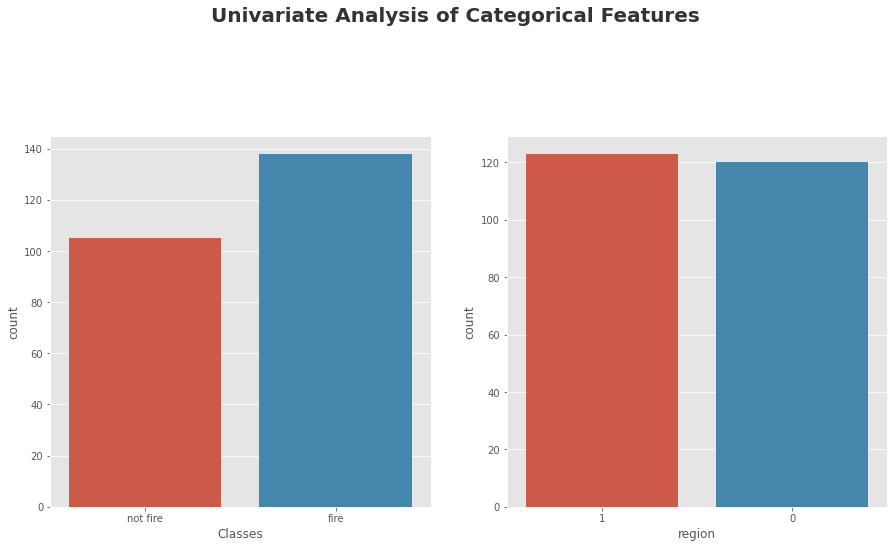

In [84]:
# categorical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
categorical_features = [col for col in data.columns if data[col].dtypes == 'O']

for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=data[categorical_features[i]])
    plt.xlabel(categorical_features[i])

Observations:
Category wise dataset is balanced


#### **Numerical Columns**

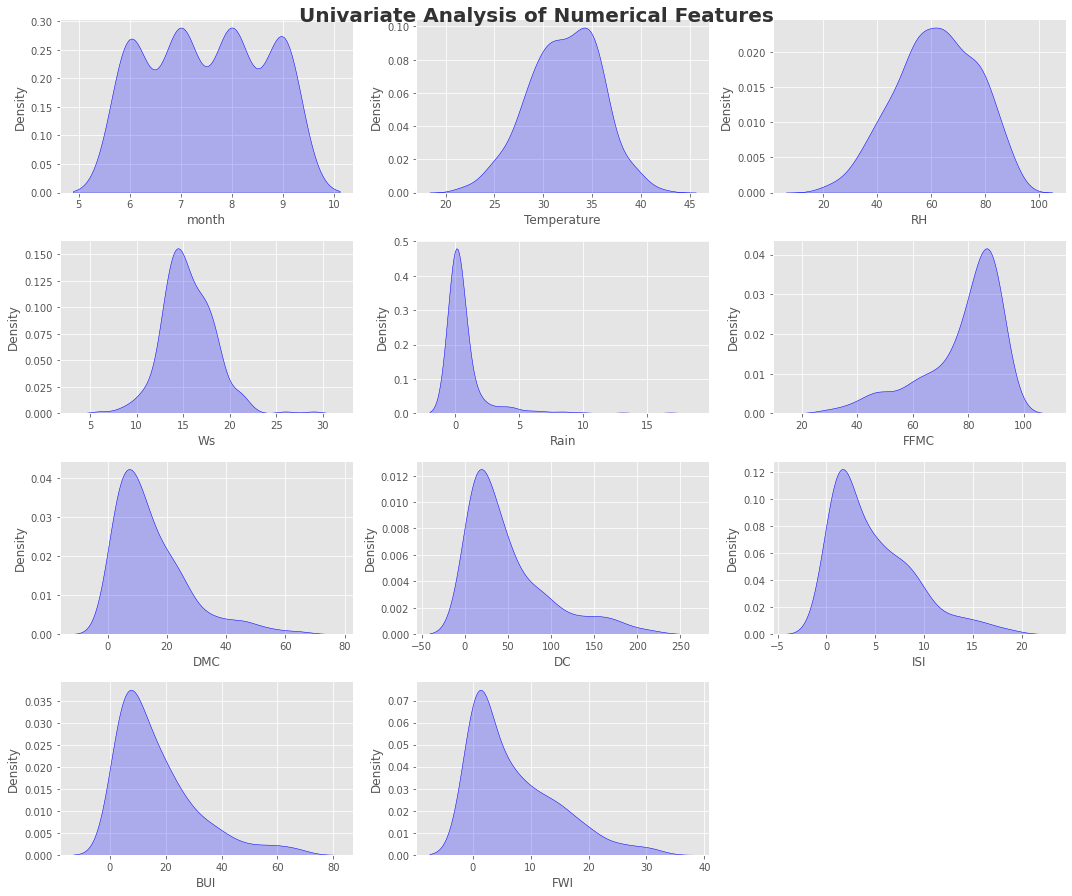

In [85]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

Observations:
1. 'Temperature',  'RH',  'Ws', columns are normally distributed. 
2. Rain column has outliers
3. 'FFMC' column is left skewed
4.  'DMC',  'DC',  'ISI',  'BUI',  'FWI' columns are right skewed

### 1.3.3  Multivariate analysis

* Multivariate analysis is the analysis of more than one variable.

**Checking for multicolinearity**

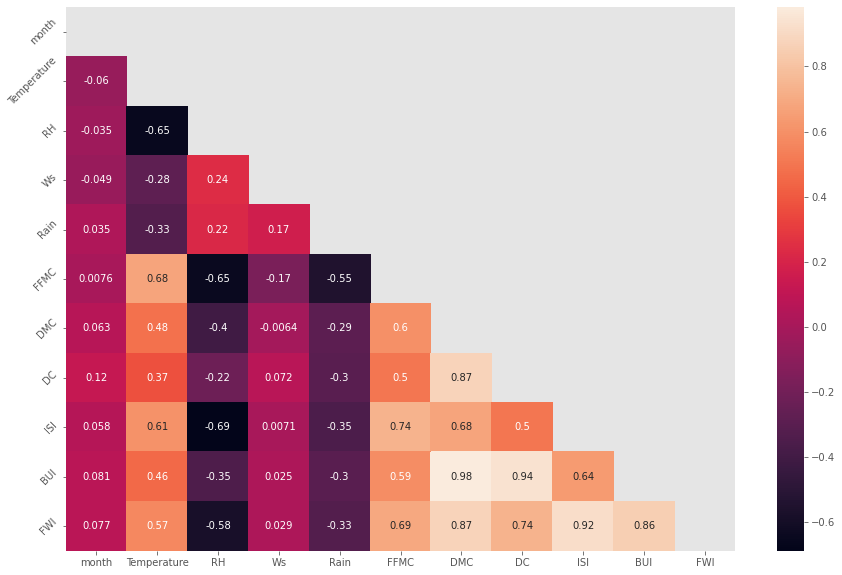

In [86]:
# In numerical column
plt.figure(figsize = (15,10))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask = matrix)
plt.yticks(rotation=45)
plt.show()

Observations: 

1. DC and DMC columns are **highly correlated**
2. BUI Column has **very high correlation** with DMC and DC columns
3. FWI is **very highly correlated** with ISI column
4. FWI is **highly correlated** with BUI column 

### 1.3.4 Relation between feature and label column 

In [87]:
feature = data.drop(columns = 'Classes')
feature.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI',
       'BUI', 'FWI', 'region'],
      dtype='object')

Here we will make an approach to understand the relation between the various columns with the column 'Classes'.

* **Feature columns are:** 'day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region'

* **Label columns:** 'Classes



In [88]:
feature_continous = [col for col in feature.columns if data[col].dtypes != 'O']
feature_numeric = [col for col in feature.columns if data[col].dtypes == 'O']

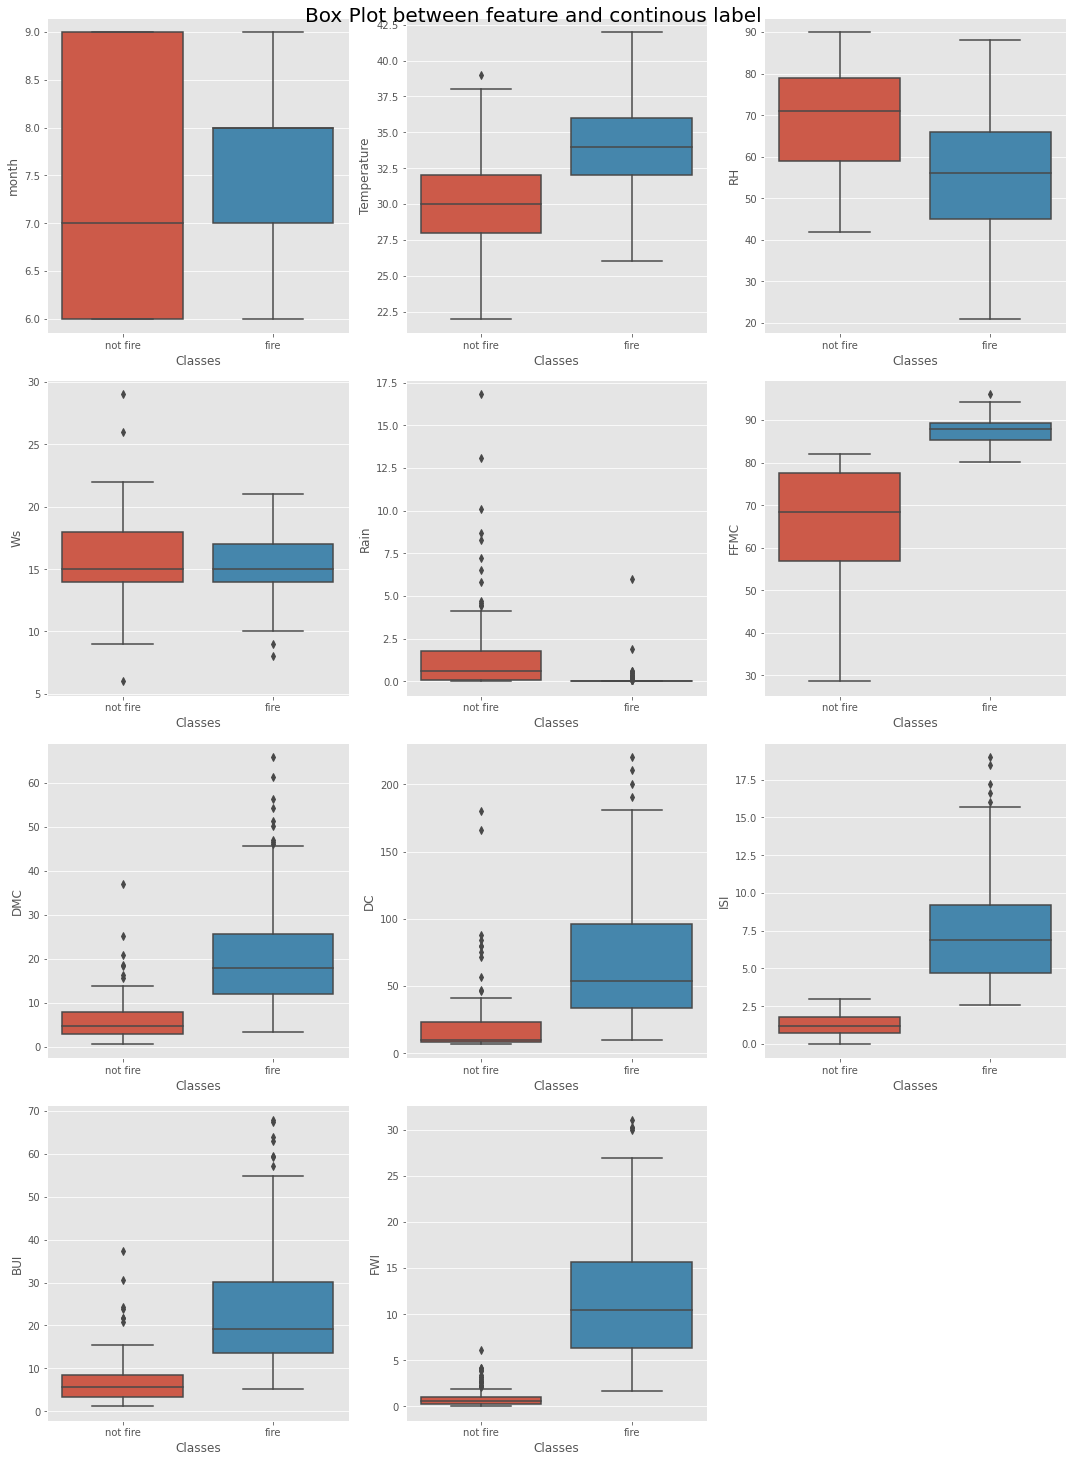

In [89]:
fig = plt.figure(figsize=(15, 50))
plt.suptitle('Box Plot between feature and continous label ', fontsize = 20, y = 1)

for i in range(0, len(feature_continous)):
    ax = plt.subplot(10, 3, i+1)
    sns.boxplot(data = data, x = 'Classes', y = data[feature_continous[i]])
    plt.tight_layout()

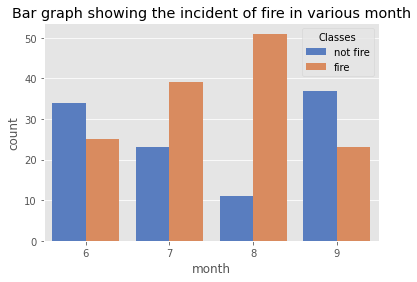

In [90]:
# Checking for month column for impact on fire 
plt.title('Bar graph showing the incident of fire in various month')
sns.countplot(data= data, hue = 'Classes', x= 'month', palette = "muted");

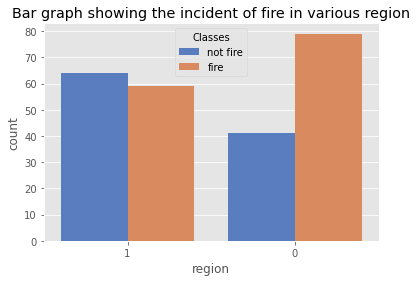

In [91]:
# Checking for region column for impact on fire 
plt.title('Bar graph showing the incident of fire in various region')
sns.countplot(data= data, hue = 'Classes', x= 'region', palette = "muted");


**Preliminary Conclusions:**
1. If the temperature increases there is increase in the chance of fire.
2. If the humidity increases there is slight decrease in the chance of fire.
3. Wind speed has no impact on fire
4. If rain is increased then chance of fire is significantly decreased
5. If FFMC > 80 chance of fire is very high 
6. If DMC > 10  chance of fire is very high
7. If DC > 50  chance of fire is very high
6. If ISI > 5  chance of fire is very high
6. If BUI > 15  chance of fire is very high
6. If FWI > 5  chance of fire is very high
6. Chances of fire in month of june and august is high




In [92]:
data.columns
max(data['Temperature']), min(data['Temperature']), len(data['Temperature']), np.mean(data['Temperature']), np.std(data['Temperature'])

(42, 22, 243, 32.17283950617284, 3.6338264138976832)

# Model Building 

Over here we have to predict the "Fire" based on the dataset.

In [93]:
data.head()
data['Classes'] = data['Classes'].apply(lambda x: 1 if x == 'fire' else 0)

Checking for the target class to being balanced or not. 

In [94]:
data['Classes'].value_counts()/len(data)*100

1    56.790123
0    43.209877
Name: Classes, dtype: float64

Observation: 

Classes column is balance

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, f1_score, classification_report


In [96]:
x = data.drop(columns = ['Classes'])
y = data['Classes']


In [97]:
x_scaled = pd.DataFrame(x_train, columns = x.columns)



In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 35, random_state = 52)

In [99]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##  Model Training 

#### 1.Basic Model

In [100]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)


Checking the performance of Basic Model

Confusion Matrix: 
[[18  0]
 [ 2 15]]

Accuracy Score: 0.9428571428571428

F1 Score: 0.9375

ROC Score: 0.9411764705882353

AUC Score: (array([0., 0., 1.]), array([0.        , 0.88235294, 1.        ]), array([2, 1, 0]))



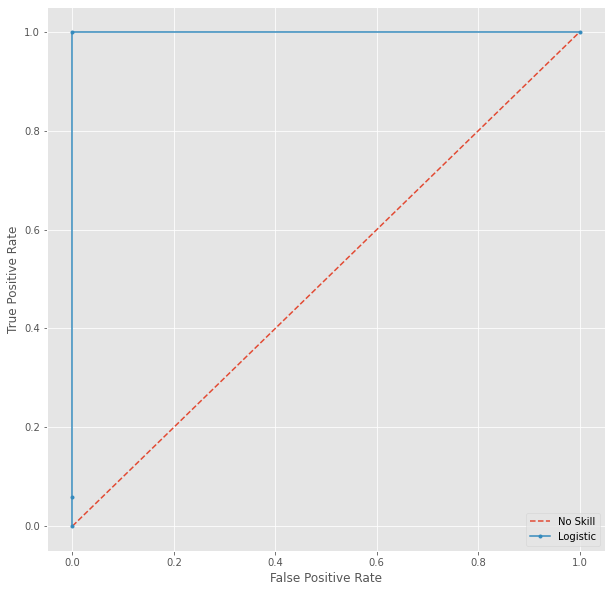

In [101]:
# confusion matrix
print('Confusion Matrix' , end = ': \n')
print(confusion_matrix(y_test,y_pred_lr), end = '\n\n')

print('Accuracy Score', end = ': ')
print(accuracy_score(y_test,  y_pred_lr), end = '\n\n')

print('F1 Score', end = ': ')
print(f1_score(y_test,  y_pred_lr), end = '\n\n')

print('ROC Score', end = ': ')
print(roc_auc_score(y_test,  y_pred_lr), end = '\n\n')

print('AUC Score', end = ': ')
print(roc_curve(y_test,  y_pred_lr), end = '\n\n')

# predict probabilities
lr_probs = model_lr.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# calculate scores
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.figure(figsize = (10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Classification Report

In [103]:

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.88      0.94        17

    accuracy                           0.94        35
   macro avg       0.95      0.94      0.94        35
weighted avg       0.95      0.94      0.94        35

